### Objective
In this project we will explore how geospatial data can help media owners and media buyers with decision making in OOH marketing & advertising.
### Problem Statement
1. Where should brand owner or media buyer display their content to maximize the number of audiences?
2. Is there any correlation among hour, number of POIs (Point of Interest), number of roads and number of audiences?
3. Where should media owners build their next billboard?

### Brief Overview of the Data
The dataset has 13 features:
1. latitude
2. longitude
3. districtName
4. date
5. Hour
6. count_id
7. motorway
8. trunk
9. primary
10. secondary
11. tertiary
12. count_poi
13. billboard_object_id
14. total_num_road

In [1]:
# Import packages
import pandas as pd
import numpy as np
import plotly.express as px
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read CSV
df = pd.read_csv("kl_billboard.csv")
print(df.head())

   latitude   longitude  districtName      date  hour  count_id  motorway  \
0  3.213979  101.638397  TAMAN KEPONG  1/1/2020     0        23       NaN   
1  3.213979  101.638397  TAMAN KEPONG  1/1/2020     1        33       NaN   
2  3.213979  101.638397  TAMAN KEPONG  1/1/2020     2        31       NaN   
3  3.213979  101.638397  TAMAN KEPONG  1/1/2020     3        31       NaN   
4  3.213979  101.638397  TAMAN KEPONG  1/1/2020     4        57       NaN   

   trunk  primary  secondary  tertiary  count_poi  \
0    NaN     14.0        7.0       NaN         16   
1    NaN     14.0        7.0       NaN         16   
2    NaN     14.0        7.0       NaN         16   
3    NaN     14.0        7.0       NaN         16   
4    NaN     14.0        7.0       NaN         16   

                                 billboard_object_id  total_num_road  
0  BBFDEFB262A6E49AB168FCB59FD049733B95A49E7DCCDB...              21  
1  BBFDEFB262A6E49AB168FCB59FD049733B95A49E7DCCDB...              21  
2  BB

### Data Exploration

In [12]:
# Describe the dataset
print(df.describe())

           latitude     longitude          hour      count_id     count_poi  \
count  88314.000000  88314.000000  88314.000000  88314.000000  88314.000000   
mean       3.140651    101.691464     11.561655    185.677378     57.789071   
std        0.034504      0.029697      6.915107    266.904217     80.320518   
min        3.048565    101.615531      0.000000      1.000000      0.000000   
25%        3.120596    101.672947      6.000000     33.000000      6.000000   
50%        3.146153    101.697026     12.000000     78.000000     23.000000   
75%        3.159815    101.712178     18.000000    215.000000     80.000000   
max        3.242625    101.749957     23.000000   2171.000000    365.000000   

       total_num_road  
count    88314.000000  
mean        42.721177  
std         26.852819  
min          0.000000  
25%         23.000000  
50%         37.000000  
75%         57.000000  
max        131.000000  


In [13]:
# Find features that has missing value
print(df.isna().any())

latitude               False
longitude              False
districtName           False
date                   False
hour                   False
count_id               False
count_poi              False
billboard_object_id    False
total_num_road         False
dtype: bool


In [4]:
# Since the total number of roads are present, we can drop different types of roads such as motorway, trunk etc.
df.drop(columns = ["motorway", "trunk", "primary", "secondary", "tertiary"], inplace = True)
print(df.head())

   latitude   longitude  districtName      date  hour  count_id  count_poi  \
0  3.213979  101.638397  TAMAN KEPONG  1/1/2020     0        23         16   
1  3.213979  101.638397  TAMAN KEPONG  1/1/2020     1        33         16   
2  3.213979  101.638397  TAMAN KEPONG  1/1/2020     2        31         16   
3  3.213979  101.638397  TAMAN KEPONG  1/1/2020     3        31         16   
4  3.213979  101.638397  TAMAN KEPONG  1/1/2020     4        57         16   

                                 billboard_object_id  total_num_road  
0  BBFDEFB262A6E49AB168FCB59FD049733B95A49E7DCCDB...              21  
1  BBFDEFB262A6E49AB168FCB59FD049733B95A49E7DCCDB...              21  
2  BBFDEFB262A6E49AB168FCB59FD049733B95A49E7DCCDB...              21  
3  BBFDEFB262A6E49AB168FCB59FD049733B95A49E7DCCDB...              21  
4  BBFDEFB262A6E49AB168FCB59FD049733B95A49E7DCCDB...              21  


### Question 1
Where should brand owner or media buyer display their content to maximize the number of audiences?

(1237, 6)


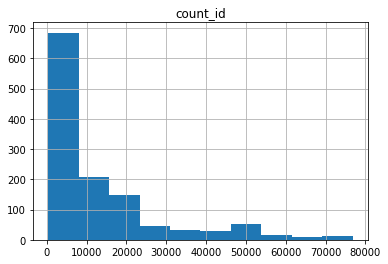

In [5]:
# Find the total number of mobile devices around the billboard
df_total_audience = df.groupby(["billboard_object_id", "districtName", "latitude", "longitude"], as_index = False) \
                        [["count_id"]].sum()
df_total_audience.sort_values(by = ["count_id"], ascending = False, inplace = True)

# Determine percentage rank
df_total_audience["pcnt_rank"] = df_total_audience["count_id"].rank(method = "max", pct=True)

# Determine the shape of the dataframe where total number of rows corresponds to total number of billboards
print(df_total_audience.shape)

# Plot a histogram with 10 bins to find the distribution of audiences around the billboard
hist = df_total_audience[["billboard_object_id", "count_id"]].hist(bins=10)

**Analysis:** Out of 1237, more than half of the billboards have potential reach below 10,000.

### Visualization on the Map

In [1]:
# Divide billboards into 10 bins based on percentage rank
conditions = [
    (df_total_audience['pcnt_rank'] >= 0.9),
    (df_total_audience['pcnt_rank'] >= 0.8) & (df_total_audience['pcnt_rank'] < 0.9),
    (df_total_audience['pcnt_rank'] >= 0.7) & (df_total_audience['pcnt_rank'] < 0.8),
    (df_total_audience['pcnt_rank'] >= 0.6) & (df_total_audience['pcnt_rank'] < 0.7),
    (df_total_audience['pcnt_rank'] >= 0.5) & (df_total_audience['pcnt_rank'] < 0.6),
    (df_total_audience['pcnt_rank'] >= 0.4) & (df_total_audience['pcnt_rank'] < 0.5),
    (df_total_audience['pcnt_rank'] >= 0.3) & (df_total_audience['pcnt_rank'] < 0.4),
    (df_total_audience['pcnt_rank'] >= 0.2) & (df_total_audience['pcnt_rank'] < 0.3),
    (df_total_audience['pcnt_rank'] >= 0.1) & (df_total_audience['pcnt_rank'] < 0.2),
    (df_total_audience['pcnt_rank'] >= 0.0) & (df_total_audience['pcnt_rank'] < 0.1)
    ]

# create a list of the values we want to assign for each condition
values = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
df_total_audience['tier'] = np.select(conditions, values)

NameError: name 'df_total_audience' is not defined

**Note:** The following plot is ONLY available with mapbox token. Mapbox token was not added with the repository for security
purpose. You can sign in and get you own mapbox token from https://www.mapbox.com/

Once you have the mapbox token, you can run the following code for interactive scatter plot map.
```
# Read Mapbox token
px.set_mapbox_access_token(open(".mapbox_token").read())

# Display data on the map
fig = px.scatter_mapbox(df_total_audience, lat="latitude", lon="longitude", 
                        color="count_id", size="tier", size_max=20, zoom=10)
fig.show()
```

**Output**

![Scatter Plot Entire KL](scatter_plot_1.png)

![Scatter Plot with Highest Reach](scatter_plot_1.png)

![Scatter Plot with Highest Reach](scatter_plot_2.png)

![Scatter Plot with Highest Reach](scatter_plot_3.png)

**Analysis:** Billboards marks with yellow or orange should be targeted to maximize number of audiences. The plot is interactive. Please use the zoom tool to have a closer look.

### Question 2
Is there any correlation among hour, number of POIs (Point of Interest), number of roads and number of audiences?

In [7]:
print(df.head())

   latitude   longitude  districtName      date  hour  count_id  count_poi  \
0  3.213979  101.638397  TAMAN KEPONG  1/1/2020     0        23         16   
1  3.213979  101.638397  TAMAN KEPONG  1/1/2020     1        33         16   
2  3.213979  101.638397  TAMAN KEPONG  1/1/2020     2        31         16   
3  3.213979  101.638397  TAMAN KEPONG  1/1/2020     3        31         16   
4  3.213979  101.638397  TAMAN KEPONG  1/1/2020     4        57         16   

                                 billboard_object_id  total_num_road  
0  BBFDEFB262A6E49AB168FCB59FD049733B95A49E7DCCDB...              21  
1  BBFDEFB262A6E49AB168FCB59FD049733B95A49E7DCCDB...              21  
2  BBFDEFB262A6E49AB168FCB59FD049733B95A49E7DCCDB...              21  
3  BBFDEFB262A6E49AB168FCB59FD049733B95A49E7DCCDB...              21  
4  BBFDEFB262A6E49AB168FCB59FD049733B95A49E7DCCDB...              21  


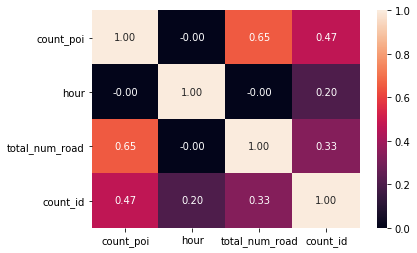

In [8]:
# Group by the number of audiences based on hour and number of POIs
df_poi_hour = df.groupby(["count_poi", "hour", "total_num_road"])[["count_id"]].sum()
df_poi_hour.reset_index(inplace = True)

# Determine correlation matrix
sns.heatmap(df_poi_hour.corr(), annot=True, fmt = "0.2f")
plt.show()

**Analysis:** The correlation between number of POIs and the number of audiences around the billboard are comaparatively higher than correlation between hour and number of audiences. Additionally, number of roads around the billboard has low correlation with number of audiences.

### Question 3
Where should media owners build their next billboard?

In [9]:
# Determine the districts that should be targeted for building a new billboard
# Count the number of billboards for each tier in a district.
df_area = df_total_audience.groupby(["districtName", "tier"], as_index = False)[["billboard_object_id"]].count()

# Choose districts with tier 9 or 10
print(df_area[df_area.tier >= 9].districtName.unique())

['BRICKFIELDS SELATAN' 'BRICKFIELDS UTARA' 'BUKIT NANAS' 'BUKIT PETALING'
 'BUKIT TRAVERS' 'BUKIT WELD' 'CHANGKAT RAJA CHULAN' 'IMBI PASAR'
 'JALAN MELAYU' 'JALAN RAJA MUDA' 'JALAN SULTAN' 'JALAN TUN SAMBANTHAN'
 'KAMPONG HAJI ABDULLAH HUKOM' 'KAMPONG LOKE YUEN' 'KAMPONG PANTAI HALT'
 'LEBOHRAYA FOCH' 'MEDAN PASAR' 'PANTAI BAHARU' 'PERSIARAN SYED PUTRA'
 'TAMAN BUNGA' 'TIONG NAM']


### Conclusion
In this project we analyze the geospatial data to make better marketing and advertising decisions.

We identified the billboards that can optimize audience reach, determined correlation among hour of the day, number of POIs, number of roads and number of audiences. Lastly, we identified the area where media owners should invest for next billboard.